In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

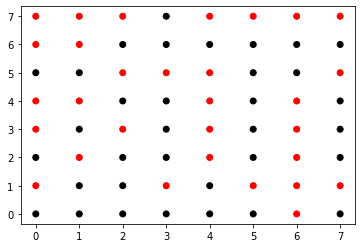

In [3]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')
plot_grid(narr)

Заполним базовое поле целиком нулями

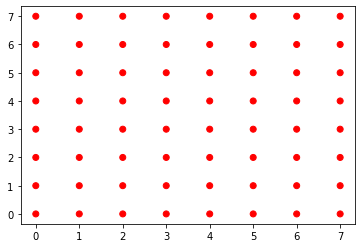

In [5]:
current = np.zeros(size*size).reshape(size,size).astype('bool')
plot_grid(current)

Переборная функция определяющая можно ли закрасить ячейку

In [7]:
def findPlacefor1(chain, current, size):
    for i in range(size):
        for j in range(size):
            if current[i, j] or ((i == 0 or not current[i - 1, j]) and (j == 0 or not current[i, j - 1]) and (i == size - 1 or not current[i + 1, j]) and  (j == size - 1 or not current[i, j + 1])):
                chain.append((i, j))

Делаем всё аналогично примеру с предвыборной кампанией: идём по нашей цепочке и если в следующей ячейке больше вариантов с местами для закраски - переходим к ней, иначе отсаемся с взвешенными вероятностями.


In [8]:
def step(current, size):
    chain = []
    findPlacefor1(chain, current, size)
    ran = chain[np.random.randint(0, len(chain))]
    
    new = np.array(current)
    new[ran[0], ran[1]] = not current[ran[0], ran[1]]
 
    new_chain = []
    findPlacefor1(new_chain, current, size)
 
    if np.random.uniform() > len(chain)/len(new_chain):
        return current
    return new

Метод монте-карло для оценивания среднего количества закрашенных вершин

In [9]:
chains = []
for i in range(100000):
    current = step(current, size)
    chains.append((abs(current)).sum())
E = np.array(chains).mean()

In [10]:
print('E = ', E)

E =  15.21776


Стационарность:

In [16]:
from scipy import stats
def g_test(x, start=0.1, end=0.5):
    return stats.ttest_ind(x[:int(len(x) * start)], x[-int(len(x) * end):], equal_var=False)


for i in range(10):  
    print(g_test(chains[1000*i:]))

Ttest_indResult(statistic=-5.225057662056909, pvalue=1.7660076774950955e-07)
Ttest_indResult(statistic=-2.7214198692754343, pvalue=0.006508155959522216)
Ttest_indResult(statistic=-3.2817753053893073, pvalue=0.0010340787012610713)
Ttest_indResult(statistic=-2.794038485073011, pvalue=0.005212506326865553)
Ttest_indResult(statistic=-1.6200237161146036, pvalue=0.10524954609240832)
Ttest_indResult(statistic=0.5954621626089694, pvalue=0.5515442617410138)
Ttest_indResult(statistic=1.3813676945457634, pvalue=0.16718851031346696)
Ttest_indResult(statistic=0.028937378460146317, pvalue=0.9769149670647361)
Ttest_indResult(statistic=1.2015204616968822, pvalue=0.22957104784955668)
Ttest_indResult(statistic=3.358409053181412, pvalue=0.000786200478481152)


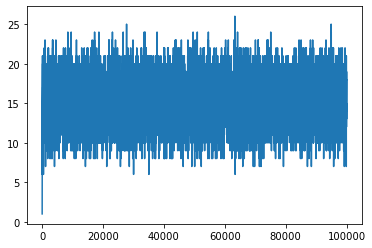

In [17]:
plt.plot(chains)
plt.show()

График плотности

<function matplotlib.pyplot.show(*args, **kw)>

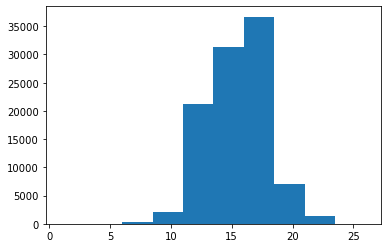

In [18]:
plt.hist(chains)
plt.show